# 2. Thermodynamics (i)

The gas we were thinking about in the previous lecture must satisfy conservation laws: Conservation of mass $m_a$, momentum $m_a[u, v, w]^T=m_a\mathbf{u}$ and energy $E$[^fnfd], which give us extremely powerful tools to predict the evolution of the atmospheric gas. Therefore, a lot of atmospheric science boils down to studying flows of mass, momentum and energy through the atmosphere. In the next two lectures, we will use simplified versions of the vertical momentum and energy flows, to work towards the simplest possible model of the troposphere's vertical structure. That is, we will study the globally (and decadally) averaged atmosphere - the atmosphere that sets our global climate. As we will see in the next lecture, even smaller, local phenomena that determine the weather are often studied as "perturbations" to this basic, vertical structure.

Because the energy flows in the atmosphere are driven by solar radiation, we can only truly understand them once we have studied radiation in module 6[^fnclim]. But we can already get pretty accurate vertical profiles if we take the energy supply for granted for a moment, and just focus on the consequences.

Along the way, we will have to make many definitions of different thermodynamic variables (mostly energies, entropies and moistures). Remembering, understanding and distinguishing between these is hard and tedious [^fnlec], so we will try to present them in service of our goal of understanding the atmosphere's vertical structure. However, mastering this "grammar" is essential to speak the language of atmospheric science.

```{note} Questions you should be able to answer at the end of this module:
   - Why does the troposphere's temperature and pressure drop off with height the way they do?
   - Why do we rather use enthalpy, rather than internal energy, for our calculations?
   - What are dry and moist static energy, and why are they useful?
   - Can I read a thermodynamic (skew T-log p) diagram?
```
[^fnfd]: You can choose to derive and study those in depth in the course on [geophysical fluid mechanics](https://studyhandbook.wur.nl/modules/HWM23806?type=Cursory)
[^fnclim]: Therefore, we will return to the globally averaged vertical structure in our lectures on climate, at the end of the course
[^fnlec]: This applies to lecturers of atmospheric science too :)

<!-- Idea for lecture:
- Present the vertical structure of T and p from a bunch of soundings
- Ask: Why does it look that way?
- Say: We have to make a detour to energetics and the vertical force balance to really understand this (in the global average, there is no horizontal transport)
- Start with the vertical force balance. That will answer what happens to pressure with height, but it doesn't really answer the question we were after, because it depends on what happens with temperature with height.
So then, let's look at energetics:
- Rewrite hydrostatic law: dp/dz=-rhog => d(gz) = -dp/rho. I.e. this is now an energy statement - the energy required give the a parcel potential energy is -dp/rho. But what the heck is that? How can we relate it to the energy in the parcel? And in particular, I promised the vertical structure of temperature. It seems logical that the parcel will have to cool in a way to gain potential energy - but how exactly?
- Present the energies in the parcel, and what sources might change it. Note that gz doesn't appear, because the air doesn't care about where it is, it just knows about T, p and rho. So you get, pretty generally:
- $c_v dT + d u^2/2 + l_v dq - L_f dq_i = (Q_r + Q_a)dt - pdV/m$ where work is nicely derived from force-movement calculations in Wallace and Hobbs.
- Let's start simple: Zero moisture, zero radiation/advection (adiabatic).
- $c_vdT = -pdV/m$. So expanding the parcel leads to cooling. Makes sense (it really doesn't because this doesn't come from the gas law. Look into that.). But we had something in terms of changes in pressure, not changes in volume? Rewrite with product rule: $d(pV) = Vdp + pdV$, or $pdV = d(pV) - Vdp$. And with dry gas law ($pV=mR_dT$), $d(pV) = mR_ddT$, so $pdV/m = R_ddT - \frac{1}{\rho}dp$, i.e. because of the gas law, work (changes in volume) itself can be thought of as a combination of increasing the temperature, and reducing the pressure.
- Then we see that $c_v dT = -R_d dT - \frac{1}{\rho}dp$, i.e. $dp/\rho = (R+c_v)dT$ (or a number of other energy sources if we counted them). Defines the cooling it takes to raise the parcel! Called enthalpy (heat at constant pressure). It measures the heat lost by equilibrating to the new lower pressure.
- And it defines the simplest model we can make for the vertical temperature structure: $dT/dz = g/c_p=-10/1000=-0.01$ K/m or 10 K/km. Compare, and find it is way too much, except in the boundary layer. There, $c_pT + gz$, sometimes expressed as "the dry static energy", is conserved. We will figure out why in the BL lecture.

Next, derive potential temperature and make a thermodynamic diagram (skew T-ln p) from this -->


## The vertical structure of the troposphere

Below, you can see a plot of pressure and temperature with "geopotenial height"[^fngeo], from all radiosondes launched across the world, since 1947, up to November 2024[^fnigra]. Why do they look like this? Let's start with pressure, which is the simplest of the two.

[^fngeo]: we define this height more precisely below
[^fnigra]: these are compiled and quality-controlled by the [Integrated Global Radiosonde Archive (IGRA)](https://www.ncei.noaa.gov/products/weather-balloon/integrated-global-radiosonde-archive)

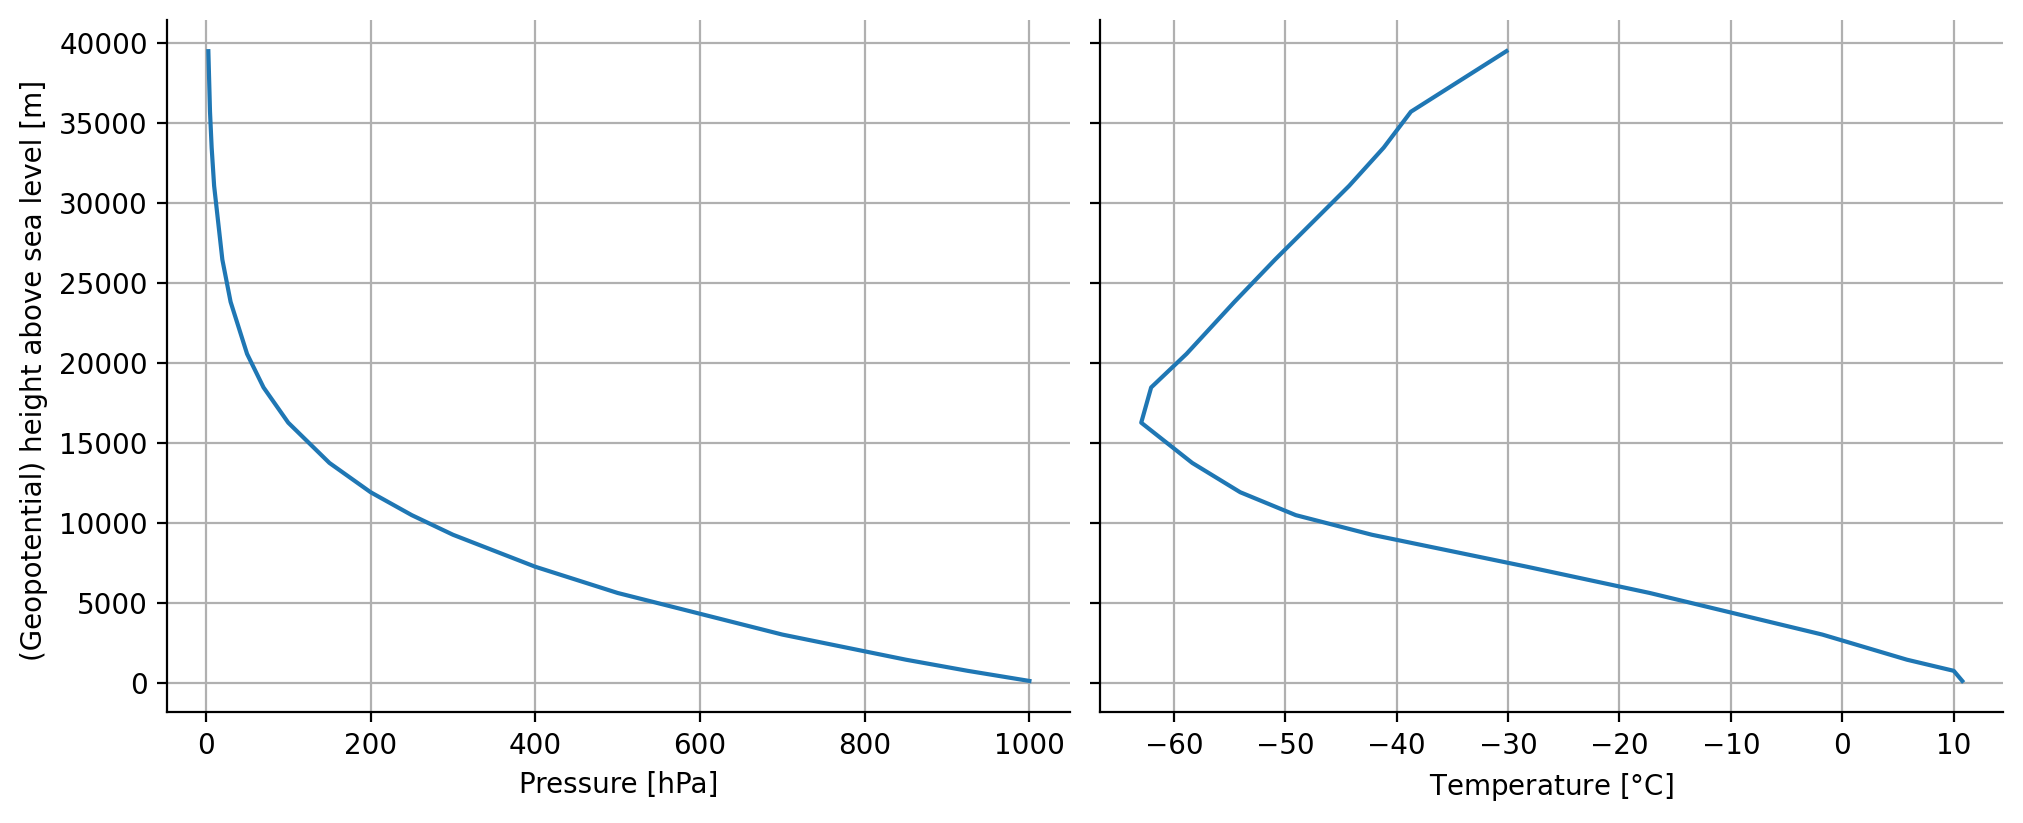

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
plt.style.use([pathlib.Path("./mplstyle/book")])

# Data from the 
# https://www.ncei.noaa.gov/data/integrated-global-radiosonde-archive/access/monthly-por/
# All monthly-averaged temperature, pressure and geopotential, from all stations, since the start of the record (1947)

# Pressure
df = pd.read_csv(r"data/ghgt_00z-mly.txt", sep=r'\s+', header=None).rename(columns={3: "pres", 4: "hgeo"})
df_pres = df[["pres", "hgeo"]].groupby(["pres"]).mean().loc[3:1000]

# Temperature
df = pd.read_csv(r"data/temp_00z-mly.txt", sep=r'\s+', header=None).rename(columns={3: "pres", 4: "temp"})
df_temp = df[["pres", "temp"]].groupby(["pres"]).mean().loc[3:1000]

# Temperatures are stored in tenths of a deg C, so they need to be divided by 10 and converted to Kelvin for later calculations:
df_temp['temp'] = df_temp['temp'] / 10 + 273.15

# Set the height coordinates of temperature to the height coordinates of pressure
df_temp = pd.concat([df_pres, df_temp], axis=1)

# Make pressure just another column in df_pres
df_pres = df_pres.reset_index()

# Plot
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].plot(df_pres['pres'], df_pres['hgeo'])
axs[0].set_xlabel('Pressure [hPa]')
axs[0].set_ylabel('(Geopotential) height above sea level [m] ')

axs[1].plot(df_temp['temp'] - 273.15, df_temp['hgeo'])
_=axs[1].set_xlabel(r'Temperature [$\degree$C]')

## Pressure - the force balance of hydrostatic equilibrium

In the global average, there cannot be vertical motion, unless the atmosphere is expanding into space. And it isn't, for almost all space and time scales we consider in this course: The globally averaged atmosphere, at any vertical level, is *static*, and is thus also not accelerating vertically - $\frac{dw}{dt}=0$. Therefore, if we look at Newton's second law ($\sum_iF_i/m= \frac{dw}{dt}$), and apply it to a globally averaged slab in the atmosphere, we know that all the forces $F_i$ which act vertically on that slab, must add up to zero.

So which forces act on such a layer? In our static situation, only the gravitational weight of all the layers that lie on top of it, and the resulting pressure force $F_p = pA_l$ on the air in the layer (remember pressure $p$ is defined as a force $F_p$  per unit area $A_l$, $p=F_p/A_l$). And traveling upwards from the surface, there are less and less such layers left above us before we get to space, so pressure decreases with height, as the left plot above shows. More precisely, for two levels separated by an infinitesimal vertical distance $dz$, the dropoff in pressure force $-dpA_l$ between the two levels must be equal to the weight of the layer in between $m_lg$:

**Need figure to support this**

$$
  F = -m_lg - dpA_l = m \frac{dw}{dt} = 0.
$$

Taking $m_l=\rho V_l=\rho A_l dz$ and treating $A_l$ and $g$ as constants[^fnglob], we divide by $A$ to get the force balance per unit area:

$$
  -\rho g dz + dp = 0,
$$

Or more generally[^fnpart]

$$
  \frac{\partial p}{\partial z} = -\rho g.
$$ (hyd-stat)

Eq.{eq}`hyd-stat` is called the hydrostatic equation. It is the first equation we derive, because it is the strongest force balance present in the atmosphere. Therefore, it holds even much more locally than the global average, in weather systems and individual thunderstorms, where there can be lots of vertical acceleration! All these motions are due to forces much smaller than those that make up hydrostatic balance. In other words, almost everywhere and always, measuring the pressure equals measuring the weight of the air column above you.

**The book introduces geopotential here**

With it, we can derive a pretty accurate model for the pressure profile plotted above. For that, we have to integrate eq.{eq}`hyd-stat`. And to do that, we choose to re-express $\rho$ in terms of $p$ with the gas law $p = \rho R_d T_v$. I.e. inserting $\rho=\frac{p}{R_dT}$ in eq.{eq}`hyd-stat` and integrating between arbitrary levels 0 to level 1 gives:

$$
  \frac{\partial p}{\partial z} & = -\frac{pg}{R_dT_v} \\
  \frac{\partial p}{p} & = -\frac{g}{R_dT_v}\partial z \\
  \int_{p_0}^{p_1} \frac{d p}{p} & = -\frac{g}{R_d}\int_{z_0}^{z_1}\frac{1}{T_v} dz \\
  \ln p_1 - \ln p_0 & = -\frac{g}{R_d}\int_{z_0}^{z_1}\frac{1}{T_v} dz
$$

We cannot integrate the right-hand side, because we have not yet discussed how $T_v$ depends on $z$ (that's the next section). However, if we make life easy by removing $T_v$'s height-dependence, and instead assume $T_v$ is equal to its weighted vertical average across the troposphere $\overline{T_v}$[^fnisot], then we can integrate, and we get something called the *hypsometric equation*:

$$
  \ln p_1 - \ln p_0 & = -\frac{g}{R_d\overline{T_v}}(z_1 - z_0) \\
  p_1 & = p_0 e^{\frac{z_1-z_0}{H}}.
$$ (hypso)

Here, we have defined the *scale height*

$$
  H = \frac{R_d\overline{T_v}}{g},
$$

which is the e-folding height of pressure. If we take level 0 in eq. {eq}`hypso` to be the surface and level 1 to be any level in the atmosphere, we get

$$
  p = p_0 e^{-z/H}.
$$ (phydro)

Knowing the surface pressure $p_0$ and estimating $\overline{T_v}\approx \overline{T} \approx -43 ^{\circ}$C between the surface and the highest level in the radisonde archive (40 km, see code cell below), eq.{eq}`phydro` models the observed pressure profile pretty well (orange line below).

[^fnglob]: In our global view, $A_l = 4\pi(R_e + z)^2$ for a level $R_e + z$ from the centre of the Earth ($R_e$ is Earth's radius). Similarly, from Newton's general law of gravity, $F_g = mG\frac{M}{(R_e+z)^2} = mg$ (i.e. $g=\frac{GM}{(R_e+z)^2}$, where $M$ is the mass of Earth, and $G$ the gravitational constant). I.e. both $A_l$ and $g$ depend on $(R_e+z)^2$, and are not entirely constant with height. Fortunately, since $R_e=6371$ km, while the troposphere is roughly 10 km deep, the assumption $(R_e+z)^2 = R_e^2$ is still accurate in the troposphere to within $\frac{z^2}{(R_e+z)^2} = \frac{10^2}{(6371+10)^2} = 0.996$ - the error is less than 0.4%. Therefore, in this course we approximate $A_l = 4\pi R_e^2$ and $g=\frac{GM}{R_e^2}$.
[^fnpart]: We use partial differences ($\partial$) in this equation because pressure depends on more independent variables than $z$.
[^fnisot]: To be precise, we define $\overline{T_v} = \frac{z_1-z_0}{\int_{z_0}^{z_1}\frac{dz}{T_v}}$

Average temperature between 0 and 40 km altitude: -43 C
Scale height: 6736 m


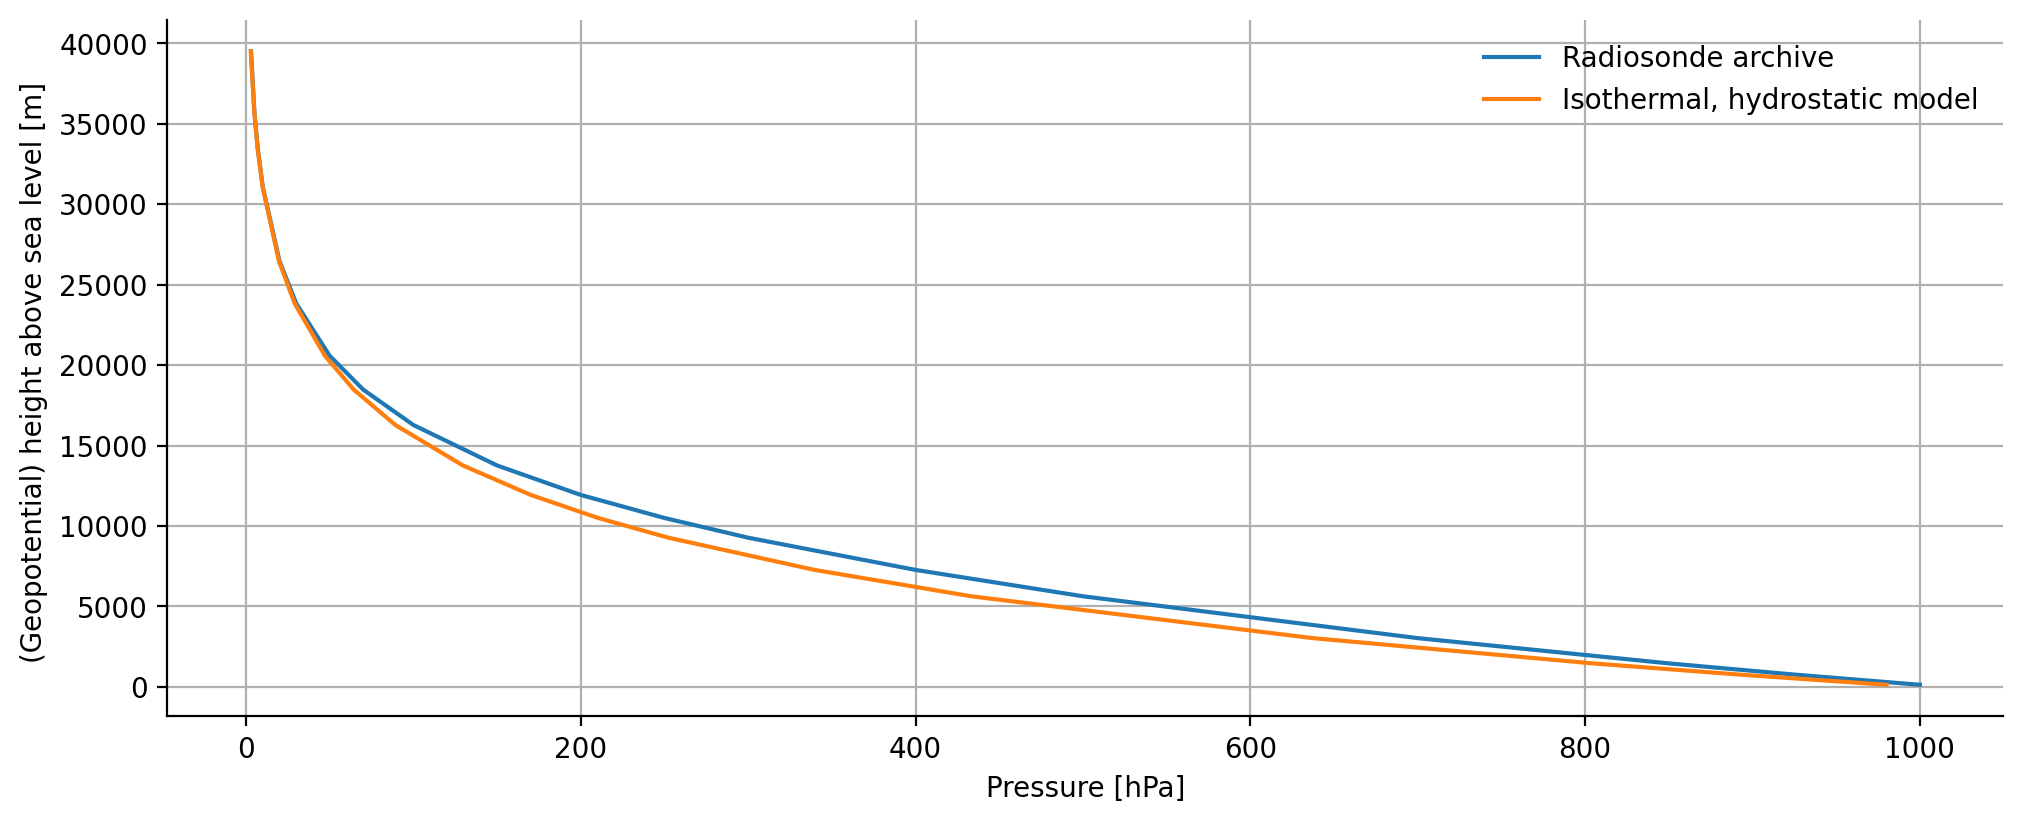

In [142]:
import numpy as np

grav = 9.81 # acceleration due to gravity
Rd = 287.05 # Dry air gas constant

ds_temp = df_temp.to_xarray().swap_dims({'pres':'hgeo'})
ds_temp = ds_temp.reindex(hgeo=list(reversed(ds_temp.hgeo)))

# Get the first pressure level in the radiosonde data, at 1000 hPa.
# This is not exactly the surface pressure, but it is a good "reference" to start comparing from
p0 = 1e3

# Compute average temperature over ~the troposphere
Tmn = ((ds_temp['hgeo'][-1] - ds_temp['hgeo'][0]) / (1./ds_temp['temp']).integrate('hgeo')).values
H = Rd*Tmn/grav # Scale height
pres_mod = p0*np.exp(-df_temp['hgeo'] / H)

fig, ax = plt.subplots(ncols=1)
ax.plot(df_pres['pres'], df_pres['hgeo'], label='Radiosonde archive')
ax.plot(pres_mod, df_pres['hgeo'], label='Isothermal, hydrostatic model')
ax.set_xlabel('Pressure [hPa]')
ax.set_ylabel('(Geopotential) height above sea level [m] ')
_=ax.legend()

print(r"Average temperature between 0 and 40 km altitude: %.0f C" %(Tmn-273.15))
print(r"Scale height: %.0f m" %H)

The model is not super in the troposphere, because eq. {eq}`hypso` will only give you the right pressure at the end points of the layer over which it is estimated (the surface and 40 km). In the troposphere, the average temperature ($-14 ^{\circ}$C) is quite a bit higher than the $\overline{T}$ we have used (and it is moister too, so $\overline{T_v}>\overline{T}$), so $H$ is larger and the pressure drops off less quickly there. 

For a better model, it's clear that we need to let go of the assumption that the atmosphere is isothermal. Indeed, if we use eq. {eq}`hypso` to iterate our way through the vertical, using the observed $\overline{T}$ at each level, we get an almost exact reproduction of the observed pressure (orange line below). Let's therefore move toward understanding this vertical structure.

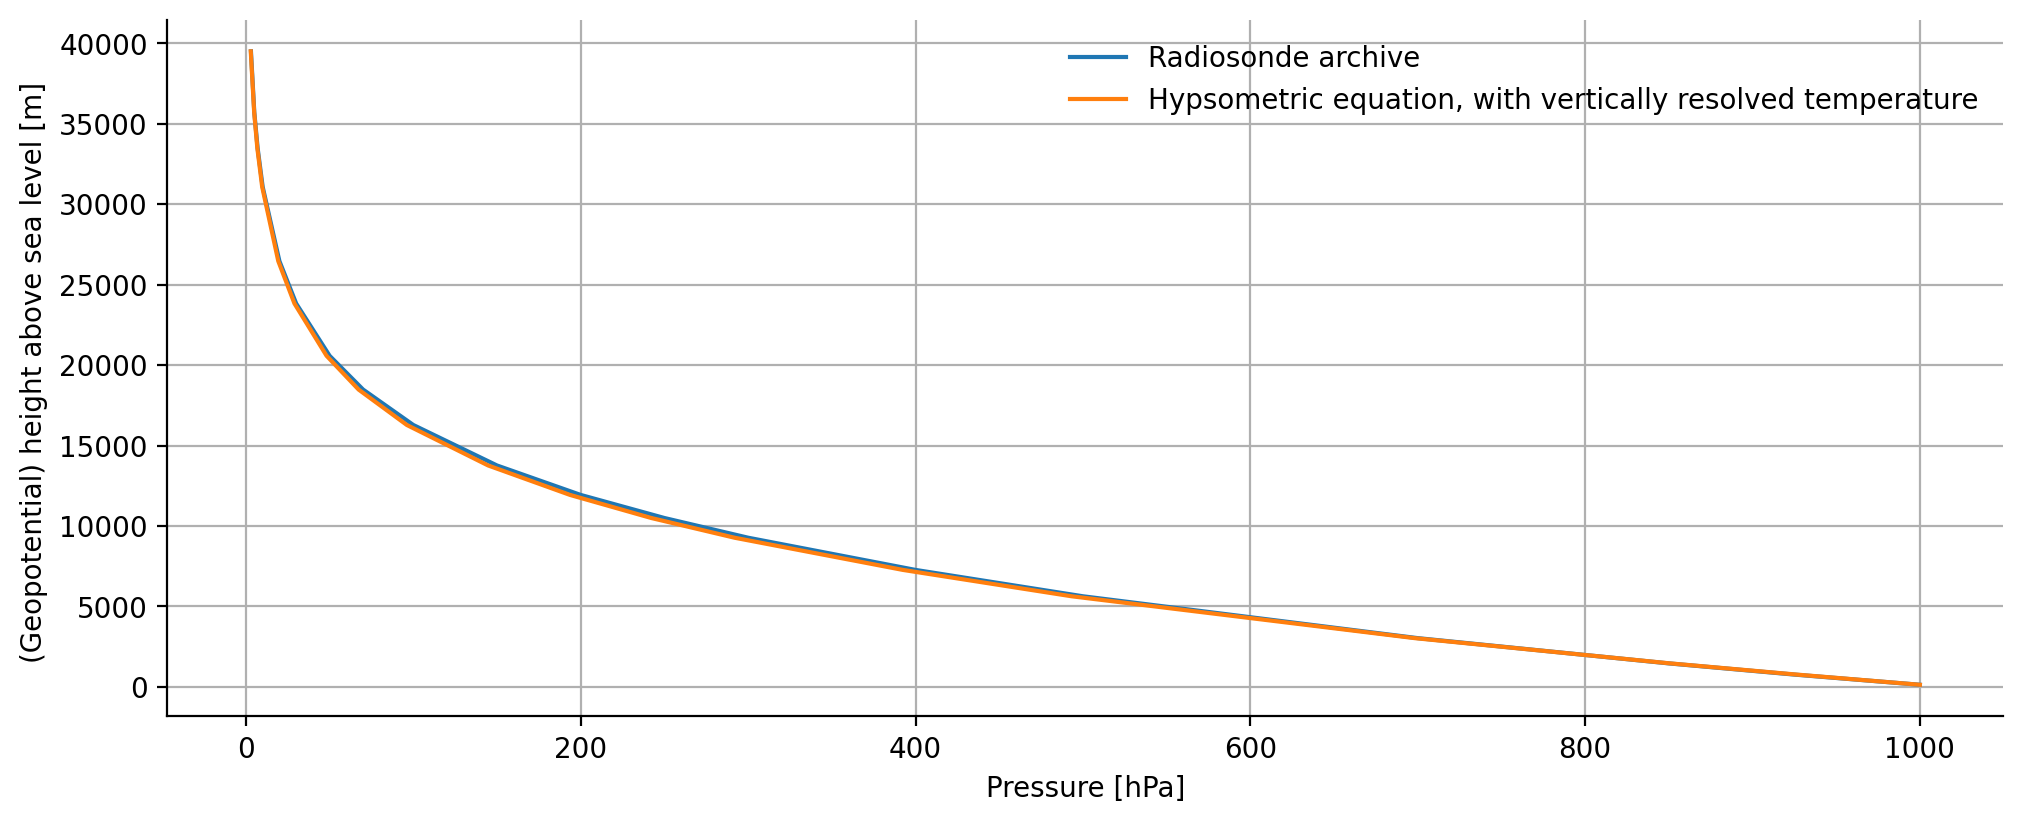

In [144]:
# Pressure from iterating through the hypsometric equation layer by layer:
pres_hyp = np.zeros(ds_temp.hgeo.size)
pres_hyp[0] = p0
for i in range(1, ds_temp.hgeo.size):
    pres_hyp[i] = pres_hyp[i-1]*np.exp(-grav/Rd/ds_temp['temp'][i]*(ds_temp['hgeo'][i] - ds_temp['hgeo'][i-1]))

fig, ax = plt.subplots(ncols=1)
ax.plot(df_pres['pres'], df_pres['hgeo'], label='Radiosonde archive')
ax.plot(pres_hyp, ds_temp['hgeo'], label='Hypsometric equation, with vertically resolved temperature')
ax.set_xlabel('Pressure [hPa]')
ax.set_ylabel('(Geopotential) height above sea level [m] ')
_=ax.legend()

## Temperature and atmospheric energetics

### Energy of an atmospheric air parcel
For a volume of air $V$ with a fixed mass $m_a$, the first law of thermodynamics states that energy $E$ must be conserved. But what is this $E$? For a parcel of moist atmospheric air in motion, a useful decomposition is[^fnmass]:

$$
E/m = c_v T + gz + \frac{1}{2}u^2 + L_v q_v - L_f q_i
$$ (energy)

Where:
- $c_v T$ measures the internal energy above $T=0$ K (absolute zero). It essentially measures the kinetic energy of the random motion of the particles within the volume, which we discussed in [the previous lecture](sec:ideal-gases). To scale this energy into temperature, we need the factor $c_v$, the heat capacity of the air in the parcel at constant volume (for dry air, $c_v \approx 717$ J/kg/K)[^fncv]. It is defined "at constant volume" to separate the internal energy from the parcel doing work through expansion (i.e. through changes in volume - see point 2. below).
- $gz$ is the gravitational potential energy above $z=0$ (sea level), with $g=9.81$ m/s$^2$
- $\frac{1}{2}u^2$ is the kinetic energy above $u=0$ (air at rest), with $u=\sqrt{u^2+v^2+w^2}$ the wind speed
- $L q_v - L_i q_i$ is the "latent" (or "hidden") energy stored in the parcel's water vapour, which is "released" when it changes phase. Specifically, $L_v q_v$ is the energy increase that would result from converting all the parcel's water vapour into liquid water (its efficiency is determined by the latent heat of vaporisation $L_v\approx 2.5 \times 10^6$ J/kg condensed water), and $-L_f q_i$ the energy increase from in turn losing some of that liquid water to $q_i$ kg ice/kg air (its efficiency is the smaller latent heat of fusion $L_f \approx 3.34\times 10^5$ J/kg frozen water).

We make these strange-looking "above reference state x" statements, because when we study energy flows, we always consider *changes* in energy relative to some reference state, and we will always have to be explicit about these states. With these reference states defined, let's think about how $E/m$ as in eq. {eq}``energy`` might actually change. In the atmosphere, there are really only three things that could happen:
1. We might exchange some of the air in the parcel with more/less energetic air, i.e. we could *advect* air in and out
2. The parcel might do work through expansion
3. The parcel might heat/cool through radiation

Although 1. is crucially important in many situations, in this course, we will mostly concentrate on 2. and 3. That is because if we view our parcel as the whole atmosphere, then we cannot exchange air with it; that is, we can already understand many coarse features of the atmosphere without it. We will get into radiation in detail next week. Here, we will focus on doing work, because it will allow us to say something about the vertical structure of the atmosphere.

### Dry air, enthalpy, and the meaning of gravitational potential energy
Test

[^fnmass]: Note that we have divided mass out on both sides, so we are looking at energy per unit mass, in J/kg. This is often called "specific energy".
[^fncv]: More precisely, if the internal energy per unit mass is $u$, then to convert small changes in $u$ to small changes in $T$ we would write $du = \frac{du}{dT} dT$, identifying $c_v=\frac{du}{dT}$. It actually varies with temperature itself, but for this course we'll keep it fixed

## Exercises (ideas)

### 1. A more intuitive interpretation of the scale height
Show that the scale height $H = M/\rho_0$, where $M$ is the mass of the atmosphere per square metre, and $\rho_0$ is the surface density. Hint: Use eq.{eq}`phydro`, and $M = \int_0^\infty \rho dz$. 

Solution: Rewrite eq. {eq}`phydro` with the gas law:

$$
  p & = p_0 e^{-z/H} \\
  \rho & = \rho_0 e^{-z/H}
$$

And insert in the mass expression:

$$
  M & = \int_0^\infty \rho_0 e^{-z/H} dz \\
  & = \left[ -\rho_s H e^{-z/H} \right]_{0}^{\infty} \\
  & = -\rho_s H \left(e^{-\infty} - e^{0} \right) \\
  & = \rho_s H
$$

So $H = M/\rho_s$, i.e. $H$ is the height that an isothermal atmosphere would have, if its density were equal to the surface density.